<a href="https://colab.research.google.com/github/krishh0609/IMDB-Semantic-Analysis-/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
import spacy
import re,string,unicodedata
from sklearn.svm import SVC
from textblob import TextBlob
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings
warnings.filterwarnings('ignore')


**Load Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB.csv to IMDB.csv


**Read CSV files**

In [ ]:
imdb_data = pd.read_csv("IMDB.csv")
print(imdb_data.shape)
imdb_data.head(10)

(9884, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
imdb_data.describe()

,review,sentiment
count,9884,9884
unique,9867,2
top,"Hilarious, clean, light-hearted, and quote-wor...",positive
freq,2,4966


In [ ]:
imdb_data['sentiment'].value_counts()

positive    4966
negative    4918
Name: sentiment, dtype: int64

In [ ]:
train_review = imdb_data.review[:8100]
train_sentiments = imdb_data.sentiment[:8100]
test_review = imdb_data.review[8100:]
test_sentiments = imdb_data.sentiment[8100:]
print(train_review.shape,train_sentiments.shape)
print(test_review.shape,test_sentiments.shape)

(8100,) (8100,)
(1784,) (1784,)


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

**Removing unnecessary words**

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)   

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

imdb_data['review'] = imdb_data['review'].apply(denoise_text)

In [ ]:
def remove_special_characters(text,remove_digits = True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)    

In [ ]:
stop = set(stopwords.words('english'))
print(stop)

{"you're", 'too', 'where', 'mustn', 'm', "should've", 'no', 'between', "wasn't", 'from', 'd', 'haven', 'being', 'does', 'her', 'yourself', 'then', 'under', 'am', 'during', 'in', 'on', 'same', 'that', "needn't", 'a', 'more', 'until', 'all', 'only', 'don', 'will', "won't", 'up', 've', "couldn't", 'didn', 'y', "shan't", 'few', 'they', 'any', 'doesn', 'can', 'ours', 'his', 'nor', 'ain', 'now', 'was', 'whom', 'how', 'couldn', 'than', 'just', 't', 'she', 'did', 'aren', 'ourselves', 'hasn', 'doing', 'itself', 'very', 'not', 'do', 'of', "you've", 'were', 'off', "wouldn't", "you'll", "don't", 'me', "hadn't", 'ma', 'above', 'other', 'such', 'wouldn', 'o', 'we', 'is', 'them', 'himself', 'mightn', 'there', "doesn't", 'while', "shouldn't", 'hers', 'our', 'i', 'the', "weren't", "that'll", "you'd", 'yours', 'own', "didn't", 'those', "isn't", 'so', 'shan', 'herself', 'its', 'but', "she's", 'themselves', 'here', "hasn't", 'below', 'are', 's', 'it', "it's", 'most', 'who', 'against', 'each', 'needn', 'wo

In [ ]:
def remove_stopwords(text,is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]

    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

imdb_data['review'] = imdb_data['review'].apply(remove_stopwords) 


In [ ]:
norm_train_reviews = imdb_data.review[:8100]
norm_train_reviews[0]

'One reviewers mentioned watching 1 Oz episode youll hooked right exactly happened meThe first thing struck Oz brutality unflinching scenes violence set right word GO Trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordIt called OZ nickname given Oswald Maximum Security State Penitentary focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home manyAryans Muslims gangstas Latinos Christians Italians Irish moreso scuffles death stares dodgy dealings shady agreements never far awayI would say main appeal show due fact goes shows wouldnt dare Forget pretty pictures painted mainstream audiences forget charm forget romanceOZ doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste Oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [ ]:
norm_test_reviews = imdb_data.review[8100:]
norm_test_reviews[8290]

'Believe say show plain hilarious basic story Kintaro Oe travels town town taking part time jobs chasing women learning life Kintaro one easiest relate characters ever made takes everything extreme laugh loud funny every time constant never ending quest study life tiny things instantly blows life death mattersOne funniest things show simply Kintaros constantly extremely top expressions reactions spends great amount time various super deformed modes like Dragon Half Trigun times less 01 seconds face turn serious mangafighterstyle life death expressions like weight lifter trying benchpress new record hilariousIf wasnt enough writing superb english voice acting couldnt possibly better Kintaros English VA perfect rolling around hes even really saying anything one thing mention though without doubt Ecchi series practically defines word youre adult anime fan get laugh movies like American Pie youll love Rirathcom'

In [ ]:
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)
print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (8100, 1575936)
BOW_cv_test: (1784, 1575936)


In [ ]:
tv = TfidfVectorizer(min_df=0, max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews = tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews)

Tfidf_train: (8100, 1575936)
Tfidf_test:   (0, 1246553)	0.5773502691896258
  (0, 979652)	0.5773502691896258
  (0, 439182)	0.5773502691896258
  (1, 1520697)	0.30151134457776363
  (1, 1504832)	0.30151134457776363
  (1, 1247291)	0.30151134457776363
  (1, 1150352)	0.30151134457776363
  (1, 874198)	0.30151134457776363
  (1, 856520)	0.30151134457776363
  (1, 780729)	0.30151134457776363
  (1, 452350)	0.30151134457776363
  (1, 328105)	0.30151134457776363
  (1, 297181)	0.30151134457776363
  (1, 35973)	0.30151134457776363
  (2, 1533104)	0.22941573387056172
  (2, 1211364)	0.22941573387056172
  (2, 1207935)	0.22941573387056172
  (2, 1185369)	0.22941573387056172
  (2, 1118618)	0.22941573387056172
  (2, 980338)	0.22941573387056172
  (2, 977501)	0.22941573387056172
  (2, 763839)	0.22941573387056172
  (2, 749838)	0.22941573387056172
  (2, 739401)	0.22941573387056172
  (2, 719634)	0.22941573387056172
  :	:
  (1779, 1497853)	0.30151134457776363
  (1779, 1466949)	0.30151134457776363
  (1779, 761957)	0.30

In [ ]:
lb = LabelBinarizer()
sentiment_data = lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(9884, 1)


In [ ]:
train_sentiments = sentiment_data[:8100]
test_sentiments = sentiment_data[8100:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [ ]:
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state = 42)
lr_bow = lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
lr_tfidf = lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
lr_bow_predict = lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 0 0 ... 0 1 1]
[1 0 0 ... 0 1 1]


In [ ]:
lr_bow_score = accuracy_score(test_sentiments,lr_bow_predict)
print('lr_bow_score:', lr_bow_score)
lr_tfidf_score = accuracy_score(test_sentiments,lr_tfidf_predict)
print('lr_tfidf_score:',lr_tfidf_score)



lr_bow_score: 0.6933856502242153
lr_tfidf_score: 0.6922645739910314


In [ ]:
lr_bow_report = classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

lr_tfidf_report = classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.68      0.70      0.69       876
    Negative       0.70      0.69      0.69       908

    accuracy                           0.69      1784
   macro avg       0.69      0.69      0.69      1784
weighted avg       0.69      0.69      0.69      1784

              precision    recall  f1-score   support

    Positive       0.69      0.68      0.68       876
    Negative       0.69      0.71      0.70       908

    accuracy                           0.69      1784
   macro avg       0.69      0.69      0.69      1784
weighted avg       0.69      0.69      0.69      1784



In [ ]:
cm_bow = confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)

cm_tfidf = confusion_matrix(test_sentiments,lr_tfidf_predict,labels = [1,0])
print(cm_tfidf)

[[623 285]
 [262 614]]
[[643 265]
 [284 592]]


In [ ]:
svm = SGDClassifier(loss='hinge',max_iter = 500,random_state=42)
svm_bow = svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)


svm_tfidf = svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [ ]:
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)


svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 0 0 ... 0 1 1]
[1 0 0 ... 0 1 1]


In [ ]:
svm_bow_score = accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score",svm_bow_score)

svm_tfidf_score = accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score",svm_tfidf_score)

svm_bow_score 0.6933856502242153
svm_tfidf_score 0.6917040358744395


In [ ]:
svm_bow_report = classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

svm_tfidf_report = classification_report(test_sentiments,svm_tfidf_predict,target_names = ['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.68      0.70      0.69       876
    Negative       0.70      0.69      0.70       908

    accuracy                           0.69      1784
   macro avg       0.69      0.69      0.69      1784
weighted avg       0.69      0.69      0.69      1784

              precision    recall  f1-score   support

    Positive       0.69      0.67      0.68       876
    Negative       0.69      0.71      0.70       908

    accuracy                           0.69      1784
   macro avg       0.69      0.69      0.69      1784
weighted avg       0.69      0.69      0.69      1784



In [ ]:
cm_bow = confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)

cm_tfidf = confusion_matrix(test_sentiments,svm_tfidf_predict,labels = [1,0])
print(cm_tfidf)

[[624 284]
 [263 613]]
[[648 260]
 [290 586]]


In [ ]:
mnb = MultinomialNB()
mnb_bow = mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

mnb_tfidf = mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [ ]:
mnb_bow_predict = mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 0 0 ... 0 1 0]
[1 0 0 ... 0 1 0]


In [ ]:
mnb_bow_score = accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score:",mnb_bow_score)

mnb_tfidf_score = accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score:",mnb_tfidf_score)

mnb_bow_score: 0.7012331838565022
mnb_tfidf_score: 0.7012331838565022


In [ ]:
mnb_bow_report = classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)

mnb_tfidf_report = classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.68      0.75      0.71       876
    Negative       0.73      0.65      0.69       908

    accuracy                           0.70      1784
   macro avg       0.70      0.70      0.70      1784
weighted avg       0.70      0.70      0.70      1784

              precision    recall  f1-score   support

    Positive       0.68      0.75      0.71       876
    Negative       0.73      0.65      0.69       908

    accuracy                           0.70      1784
   macro avg       0.70      0.70      0.70      1784
weighted avg       0.70      0.70      0.70      1784



In [ ]:
cm_bow = confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)

cm_tfidf = confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[592 316]
 [217 659]]
[[592 316]
 [217 659]]


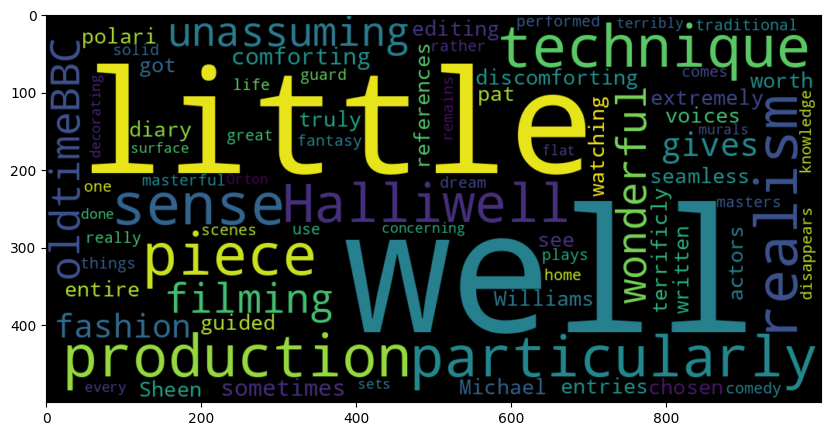

In [ ]:
plt.figure(figsize=(10,10))
positive_text = norm_train_reviews[1]
WC = WordCloud(width = 1000,height = 500,max_words = 500,min_font_size = 5)
positive_words = WC.generate(positive_text)
plt.imshow(positive_words,interpolation = 'bilinear')
plt.show()

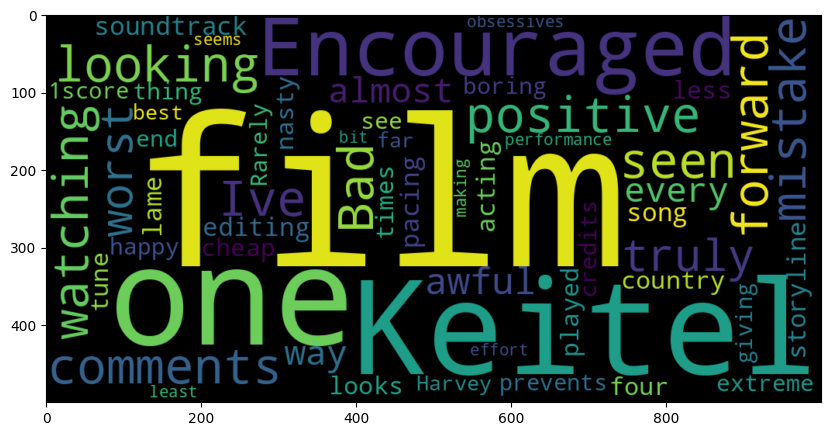

In [ ]:
plt.figure(figsize = (10,10))
negative_text = norm_train_reviews[8]
WC = WordCloud(width = 1000,height = 500,max_words = 500,min_font_size = 5)
negative_words = WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()